In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

In [3]:
# Load the dataset

df = pd.read_csv('data/Superstore dataset.csv')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [4]:
df.shape

(9800, 18)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
# Filling the missing values in the Postal code column and converting it into integer
df['Postal Code'].fillna(0, inplace=True)
df['Postal Code'] = df['Postal Code'].astype('int64')

C:\Users\cocou\AppData\Local\Temp\ipykernel_24932\2809641695.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace=True)


In [21]:
customers_per_segment = df['Segment'].value_counts().reset_index()
customers_per_segment = customers_per_segment.rename(columns={'Segment': 'Type of customer'})
customers_per_segment


,Type of customer,count
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


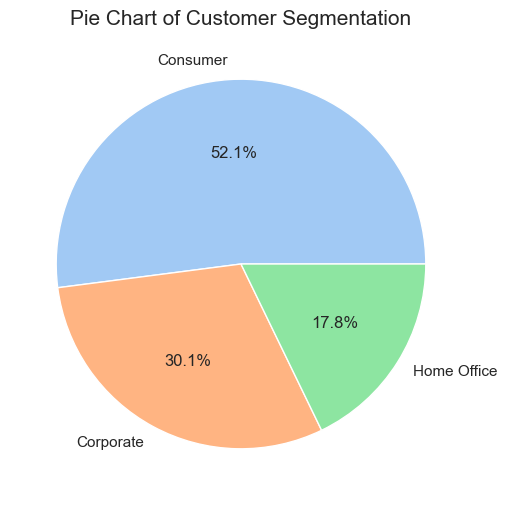

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(customers_per_segment['count'], labels=customers_per_segment['Type of customer'], 
            autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Customer Segmentation', fontsize=15)
plt.show()

In [56]:
total_sales_per_customers = df.groupby('Segment')['Sales'].sum().reset_index()
total_sales_per_customers = total_sales_per_customers.rename(columns={'Segment': 'Type of Customer', 'Sales': 'Total Sales'})
total_sales_per_customers = total_sales_per_customers.style.format({'Total Sales': '{:,.2f}'.format})
total_sales_per_customers

,Type of Customer,Total Sales
0,Consumer,"1,148,060.53"
1,Corporate,"688,494.07"
2,Home Office,"424,982.18"


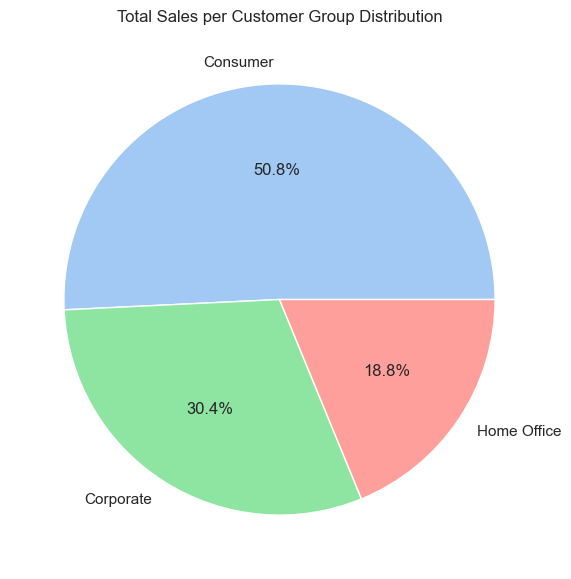

In [68]:
total_sales_per_customers_data = total_sales_per_customers.data
plt.figure(figsize=(10,7))
plt.pie(total_sales_per_customers_data['Total Sales'], labels=total_sales_per_customers_data['Type of Customer'],
             autopct='%1.1f%%', colors=sns.color_palette('pastel6'))
plt.title("Total Sales per Customer Group Distribution")
plt.show()

C:\Users\cocou\AppData\Local\Temp\ipykernel_24932\548516265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_sales_per_customers_data, x=total_sales_per_customers_data['Total Sales'],


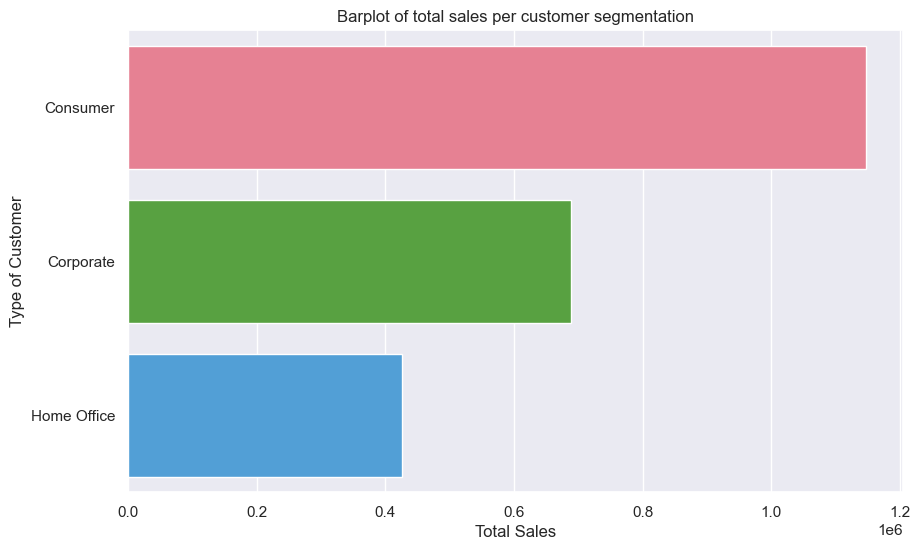

In [75]:
# Countplot of 
plt.figure(figsize=(10,6))
sns.barplot(data=total_sales_per_customers_data, x=total_sales_per_customers_data['Total Sales'],
                     y=total_sales_per_customers_data['Type of Customer'],
                     palette='husl')

plt.title('Barplot of total sales per customer segmentation')
plt.show()